In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Linear

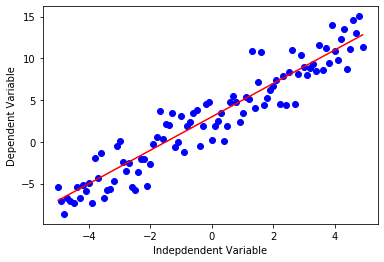

In [9]:
x = np.arange(-5.0, 5.0, 0.1)

y = 2*(x) + 3
y_noise = 2 * np.random.normal(size = x.size)
ydata = y + y_noise

#plt.figure(figsize=(8,6))

plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Quadratic

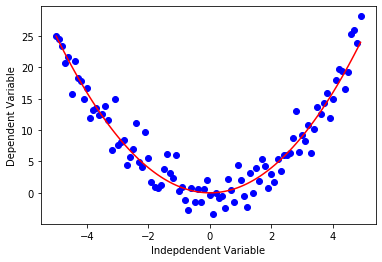

In [10]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Exponential

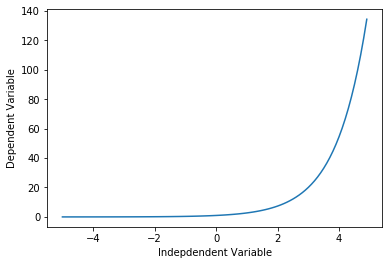

In [12]:
X = np.arange(-5.0, 5.0, 0.1)
Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Logarithmic

C:\Users\SRAVAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


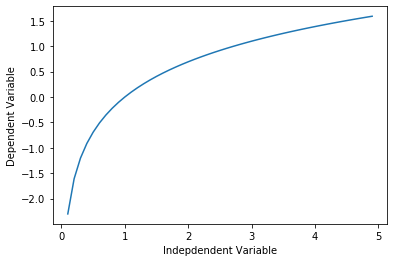

In [13]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Logistic

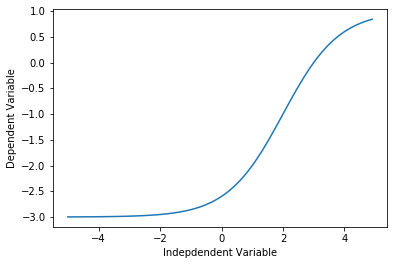

In [14]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [18]:
import numpy as np
import pandas as pd

df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


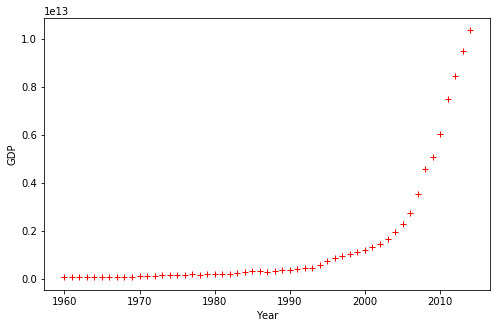

In [27]:
plt.figure(figsize=(8,5))
x_data = df["Year"].values
y_data = df["Value"].values
plt.plot(x_data, y_data, 'r+')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

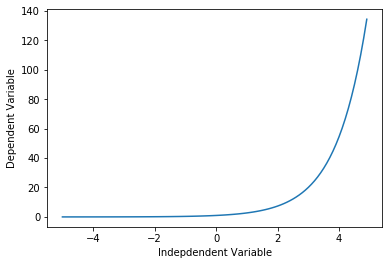

In [32]:
X = np.arange(-5.0, 5.0, 0.1)
Y =np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [33]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

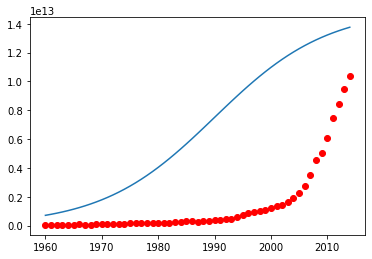

In [39]:
beta_1 = 0.10
beta_2 = 1990.0

Y_pred = sigmoid(x_data, beta_1 , beta_2)

plt.plot(x_data, Y_pred * 15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [42]:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

array([0.0057156 , 0.00478589, 0.00450854, 0.00483806, 0.00570384,
       0.00673204, 0.00732793, 0.00695878, 0.0067595 , 0.00760213,
       0.00883705, 0.00951846, 0.01083164, 0.01320831, 0.01373801,
       0.01556399, 0.01464318, 0.01664431, 0.01432975, 0.01707961,
       0.01831512, 0.01877086, 0.01965745, 0.02211047, 0.02492384,
       0.02969431, 0.02885665, 0.02620514, 0.03000746, 0.03341025,
       0.03466722, 0.03683833, 0.04103727, 0.04276985, 0.0542994 ,
       0.07069473, 0.08313453, 0.09253259, 0.09901435, 0.10521147,
       0.11639597, 0.12865827, 0.1411811 , 0.15933902, 0.18752073,
       0.21908602, 0.26362418, 0.34023675, 0.44022261, 0.48860473,
       0.58326959, 0.7235687 , 0.81716665, 0.91653856, 1.        ])

In [43]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


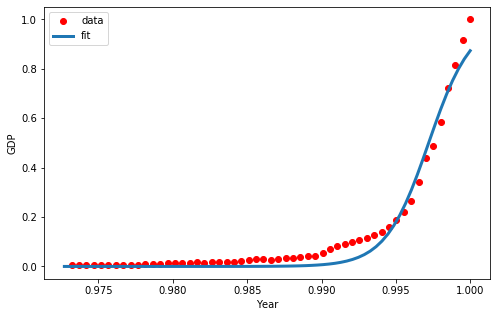

In [50]:
x = np.linspace(1960, 2015, 70)

x = x/max(x)

plt.figure(figsize=(8,5))

y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')

plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [61]:
from sklearn.metrics import r2_score
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]


popt, pcov = curve_fit(sigmoid, train_x, train_y)


y_hat = sigmoid(test_x, *popt)


print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00
R2-score: 0.93
